# Continuación técnicas de reducción de varianza

## b). Números complementarios

- Se tiene un cierto número de observaciones o valores aleatorios
- Estos valores en ocasiones puede tener algún sesgo no deseado, además de no haber sido obligado o intencionado, como ejemplo supongamos que se hacen 10 observaciones donde los valores posibles son valores entre [0,1] y en todos los casos se obtuvieron datos menores a 0.5, lo cual sería inusual.
- Obtener más observaciones puede ser costoso, no posible bajo las mismas condiciones o simplemente tiene un elevado costo computacional, así que lo que sugiere la técnica de “números complementarios” es obtener otro tanto de valores utilizando la fórmula 

> Aleatorio nuevo = Límite superior aleatorio generado - Aleatorio generado + Límite inferior aleatorio generado.
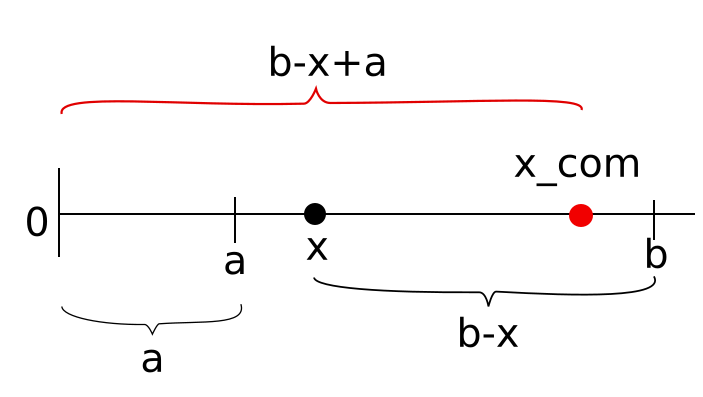

> **Ejemplo:** si $x\sim U[a,b]$ el número complementario para este número aleatorio es
>$$x_{comp}=b-x+a$$
> *Caso particular a=0,b=1* $$x_{comp}=1-x$$


- Estos valores  le dan equilibrio forzado a las observaciones o números aleatorios y permiten hacer una evaluación del proceso con valores que presentarán menor varianza.
- Además que se logra obtener el doble de números respecto a los observados para simular el proceso.

## Ejemplo de ilustración


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  # Librería para hacer ciclos
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

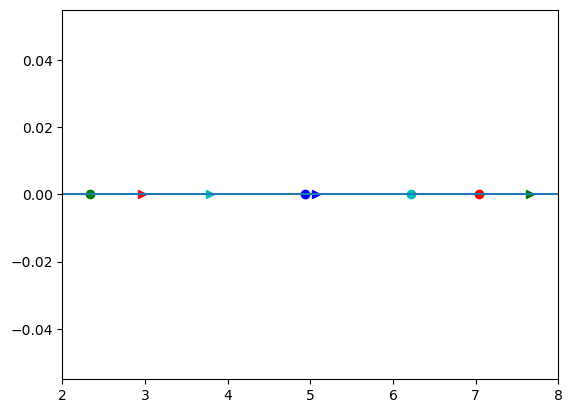

In [2]:
cycol = cycle('bgrcmk') # variable que contiene los colores a graficar
a = 2; b = 8
x = np.random.uniform(a,b,4)
xc = b - x + a
# print(x,xc)
for i in range(len(x)):   
    c = next(cycol)
    plt.plot(x[i],0,'>', c=c)
    plt.plot(xc[i],0,'o',c=c)
plt.hlines(0,a,b)
plt.xlim(a,b)
plt.show()

## Ejemplo de aplicación
Tomando como base el ejemplo de generación de números aleatorios exponenciales visto la clase pasada, ilustraremos este método.

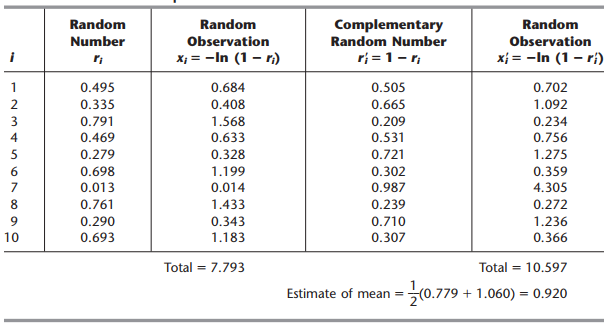

In [5]:
np.random.seed(95555)
# Función para generar variables alestorias exponenciales 
xi = lambda ri: -np.log(ri)

# Generación de Números aleatorios
r1 = np.random.rand(20)

# Media de observaciones aleatorias (Montecarlo estándar)
m_rand = xi(r1).mean()
print('Media de observaciones aleatorias      = ', m_rand)

# Números aleatorios complementarios
ri = np.random.rand(10)
ri_c = 1 - ri

ri_concat = np.concatenate([ri, ri_c])
# Media de observaciones complementarias
m_comple = xi(ri_concat).mean()
print('Media de observaciones complementarias = ', m_comple)

# m_estimada = (m_rand+m_comple)/2
# print('La media estimada con el M.N.C es      = ',m_estimada)

Media de observaciones aleatorias      =  0.6722287565317098
Media de observaciones complementarias =  0.9163836833219451


## Análisis: ¿Por qué el método funciona?

### Recordar
Ahora analicemos matemáticamente el efecto que esta sucediendo con este método.
Recordemos la expresión de la varianza del estimador de media (promedio):
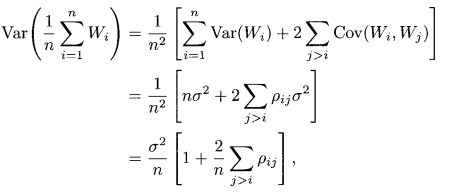
donde 
$$\rho _{X,Y}={\sigma _{XY} \over \sigma _{X}\sigma _{Y}}={E[(X-\mu _{X})(Y-\mu _{Y})] \over \sigma _{X}\sigma _{Y}}= {cov(X,Y) \over \sigma_X \sigma_Y}$$

es el coeficiente de correlación de Pearson, y su valor varía en el intervalo [-1,1], indicando el signo el sentido de la relación. En la siguiente imagen se ilustra, varios grupos de puntos (x, y), con el coeficiente de correlación para cada grupo

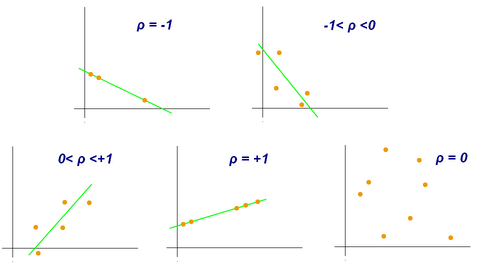

- la **covarianza** es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables.
$$Cov(X,Y)=E[XY]-E[X]E[Y]$$
- **coeficiente de correlación de Pearson** es una medida de la relación lineal entre dos variables aleatorias cuantitativas. A diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables

Ahora recordemos el promedio de dos observaciones viene dado por la siguiente expresión:
$$X^{(i)} = {X_1+X_2 \over 2}$$
Ahora consideremos la media de una muestra $\bar X(n)$ basado en las muestras promediadas $X^{(i)}$, donde su varianza estará dada por:
$$\begin{aligned}Var[\bar X(n)]&={Var(X^{(i)})\over n}\\
&= {Var(X_1)+Var(X_2)+2Cov(X_1,X_2)\over 4n}\\
&= {Var(X)\over 2n}(1+\rho(X_1,X_2))\end{aligned}$$

> Concluimos que para poder obtener una reducción de varianza, con respecto al método de monte carlo tradicional, el coeficiente de correlación $\rho(X_1,X_2)<0$. Pero la pregunta entonces es, ¿Cómo podemos inducir una correlación negativa?.

**Dibujar en el tablero la relación entre las variables {$U\sim U(0,1)$} y {$1-U$}**


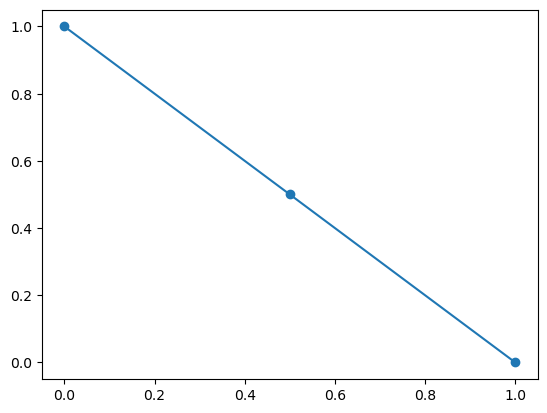

In [6]:
# Relación entre las variables x1 = U y x2 = 1 - U
# x2 = np.random.rand(5)
x2 = np.array([1,.5,0])
x1 = 1-x2
plt.plot(x1,x2,'o-')
plt.show()

El ejemplo de aplicación anterior mostró como el método es bastante sencillo y trabaja bastante bien. Pero, ¿Podemos esperar siempre un patrón similar? Desafortunadamente, la respuesta es no. La razón por la cual el enfoque funciona bastante bien en el ejemplo son dos:
1. Existe una fuerte correlación (positiva) entre $U$ y $e^u$ en el intervalo [0,1], porque la función es casi lineal allí. Esto significa que se conserva una fuerte correlación en la entrada de simulación y se convierte en una fuerte correlación en la salida de la simulación. No deberíamos esperar resultados impresionantes con funciones más complicadas y no lineales.

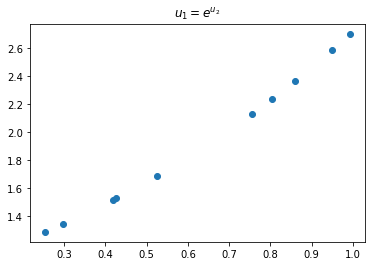

In [7]:
U1 = np.random.rand(10) 
U2 = np.exp(U1)
plt.plot(U1,U2,'o')
plt.title(r'$u_1 = e^{u_2}$')
plt.show()

En el caso de nuestro ejemplo de generación variables aleatorias exponenciales el método de la transformada inversa nos arrojó los siguientes resultados:
$$
x_i = -\ln u_i \ \rightarrow e^{-x_i} = u_i
$$
Lo cuál graficándolo nos arroja el siguiente resultado:

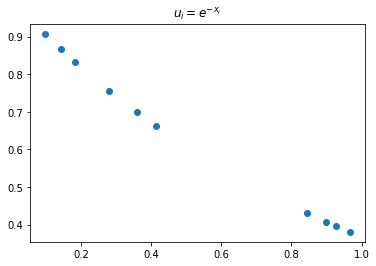

In [8]:
xi = np.random.rand(10) 
ui = np.exp(-xi)
plt.plot(xi,ui,'o')
plt.title(r'$u_i = e^{-x_i}$')
plt.show()

2.Otra razón es que la función exponencial es creciente monótona. Como veremos en breve, la monotonicidad es una condición importante para el método de muestreo estratificado.

>**Característica de las funciones monótonas:** Es decir una función es monótona cuando es creciente o decreciente en todo su dominio. 

## Ejemplo donde el método de números complemantarios puede fallar

Considere la función $h(x)$ definida como:
$$h(x)=\begin{cases}0,& x<0,\\ 2x,& 0 \leq x \leq 0.5,\\2-2x,& 0.5\leq x\leq 1,\\0, & x>1,\end{cases}$$

y supongamos que queremos aproximar la integrar $\int_0^1h(x)dx$ usando monte carlo.

Como se puede observar, la función $h(x)$ es un triangulo, y el area encerrada bajo su curva es:
$$\int_0^1h(x)dx \equiv E[h(U)]=\int_0^1h(u)\cdot 1 du = {1\over 2}$$

Ahora entonces estimemos el valor de esta integral con el método tradicional de monte carlo y con el método de números complementarios

$$\textbf{Monte carlo tradicional}\rightarrow X_I=\frac{h(U_1)+h(U_2)}{ 2}$$

$$\textbf{Método números complemantarios}\rightarrow X_c={h(U)+h(1-U) \over 2}$$

Ahora comparemos las dos varianzas de los dos estimadores:
$$Var(X_I)={Var[h(U)]\over 2}\\
Var(X_c)={Var[h(U)]\over 2}+{Cov[h(U),h(1-U)]\over 2}$$

> **Recordar la expresión para calcular la esperanza:**
> $$ \mathbb {E} [X]=\int_{-\infty }^{\infty }x f(x)dx $$

Para saber que varianza es mayor, encontramos la diferencia de estas dos varianzas, en donde se obtiene:
$$\begin{aligned}\Delta &= Var(X_c)-Var(X_I)={Cov[h(U),h(1-U)]\over 2} \\ &={1\over2}\{ E[h(U)h(1-U)]-E[h(U)]E[h(1-U)]\}\end{aligned}
$$

En este caso, debido a la forma de $h(x)$, tenemos que:
$$E[h(U)]=E[h(1-U)]={1\over 2} \rightarrow \text{expresión de la media para $U\sim U[0,1]$}$$
$$
\begin{aligned}
E[h(U)h(1-U)]&= \int_0^{1/2} h(U)h(1-U)\underbrace{f(x)}_{U\sim [0,1] = 1} du + \int_{1/2}^1 h(U)h(1-U)\underbrace{f(x)}_{U\sim [0,1] = 1} du \\
E[h(u)h(1-u)] & = \int_0^{1/2} 2u\cdot(2-2(1-u))du + \int_{1/2}^1 2(1-u)\cdot(2-2u)du \\
&= \int_0^{1/2} 4u^2du + \int_{1/2}^1 (2-2u)^2du = \frac{1}{3}
\end{aligned}
$$

Por lo tanto, $Cov[h(U),h(1-U)]={1\over 3}-{1\over 4}={1\over 12}$ y de esta manera $\Delta ={1\over 24}>0$ y se concluye entonces que la varianza del método de números complementarios es mayor que la varianza del método de monte carlo común

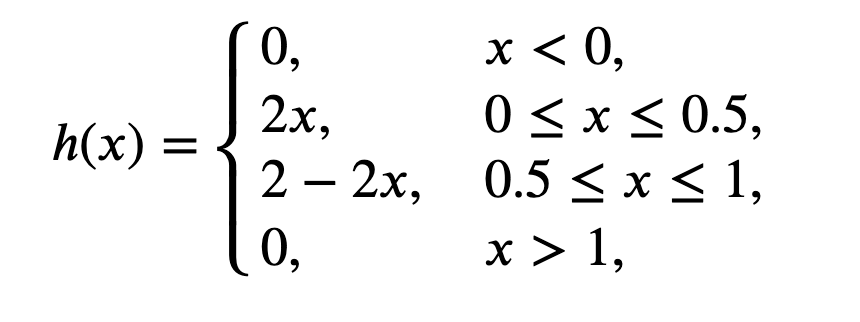

# Validación del resultado anterior

In [9]:
h = lambda x: 0 if x < 0 else (2 * x if 0<= x < 0.5 else (2 - 2 * x if 0.5 <= x <= 0.1 else 0))
h = np.vectorize(h, otypes=[float])



array(0.5)

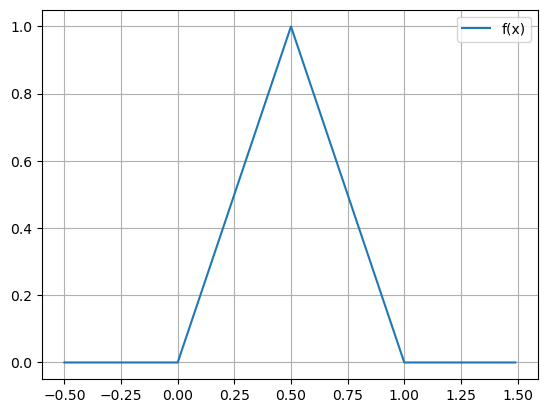

Media usando montecarlo estándar     = 0.4516821399298376
Media usando números complementarios = 0.5756873730548209
error montecarlo    = 9.663572014032484
error complementario= 15.137474610964174


In [17]:
np.random.seed(514)
# Programar función h(x)
h = lambda x: 0 if x < 0 else (2 * x if 0<= x < 0.5 else (2 - 2 * x if 0.5 <= x <= 1 else 0))
h = np.vectorize(h, otypes=[float])

# Gráfica de la función h(x)
x = np.arange(-.5,1.5,0.01)
plt.plot(x, h(x), label='f(x)')
plt.legend()
plt.grid()
plt.show()

# aproximar la media el área de la función h(x) usando montecarlo típico
N = 100
u1 = np.random.rand(N)
media_montecarlo = h(u1).mean()

# Aproximación usando método de los números complementarios
# Nota: Para ser justos tome la misma cantidad de términos para efectos de comparación
u2 = np.random.rand(int(N/2))
u2_c = 1 - u2
media_complementario = h(np.concatenate([u2, u2_c])).mean()

print('Media usando montecarlo estándar     =',media_montecarlo)
print('Media usando números complementarios =',media_complementario)

I = 0.5
print('error montecarlo    =', (abs(I - media_montecarlo) / I) * 100 )
print('error complementario=', (abs(I - media_complementario) / I) * 100 )
# print('Media teórica =',(0 + .5 + 1)/3 )
# Distrubución triangular (media)
# https://en.wikipedia.org/wiki/Triangular_distribution

## ¿Por qué fallo el método en este ejemplo?

Se demostró que las variables $U$ y $1-U$ están negativamente correlacionadas, pero en general no se puede garantizar que $X_1$ y $X_2$ cumplan esta propiedad en general.

Para estar seguros de que la correlación negativa en los números aleatorios de entrada produce una correlación negativa en la salida observada, debemos exigir una relación monótona entre ellos. La función exponencial es una función monótona, pero la función triángulo del segundo ejemplo no lo es.

## Ejemplo de aplicación: 
Ejercicio tomado de: Introduction to Operations Research, 9ª ed. pag, 1148.
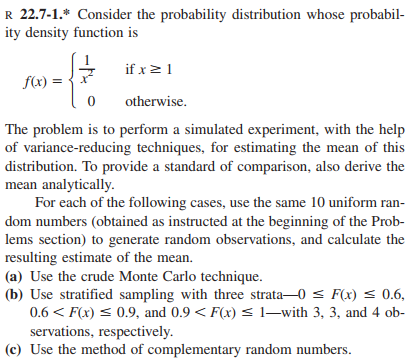

In [37]:
# Cantidad de términos
N = 10

# Función inversa
f_inv = lambda u:

# MÉTODOS PARA APROXIMAR LA MEDIA DE LA DISTRIBUCIÓN 
# 1. Montecarlo crudo


# 2. Método estratificado 


# 3. Método números complementarios


(3.697049069986027, 3.697049069986028)

# <font color = red> Tarea
**Esta tarea incluye el ejercicio dejado en la clase anterior**
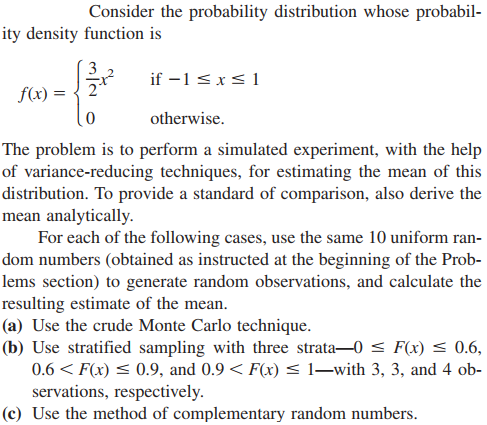
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

1. Encuentre la media analítica de la distribución usando la expresión matemática.
2. Use el método de montecarlo crudo para estimar la media de la distribución.
3. Use el método estratificado no igualmente espaciado para estimar la media de la distribución segun liteal b).
4. Use el método números complementarios para estimar la media de la distribución en base al literal c).
5. Use el método estratificado igualmente espaciado para estimar la media de la distribución segun el último párrafo de la imagen.

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}e^{x^2}\text{d}x\approx 1.46265$$

**Pasos**

6. Cree una función que realice el método de muestreo estratíficado (igualmente espaciado), recibiendo como  parámetros de entrada la cantidad de estratos, los valores a y b en los cuales se deben de generar los números aletorios y retornando las variables estratíficadas correspondientes.
7. Cree una función que realice el método de muestreo estratíficado (con intervalos no igualmente espaciados), recibiendo como parámetro la cantidad de términos que se tienen que generar en cada estrato y regrese las variables aleatorias estratificadas correspondientes.
8. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente tabla:

| Cantidad de términos | Montecarlo crudo | Error 1% | Montecarlo estratíficado 1 | Error 2 % | Montecarlo estratíficado 2 | Error 3 % |
|:--------------------:|:----------------:|:--------:|:--------------------------:|:---------:|:--------------------------:|:---------:|
|          10          |                  |          |                            |           |                            |           |
|          100         |                  |          |                            |           |                            |           |
|         1000         |                  |          |                            |           |                            |           |
|         10000        |                  |          |                            |           |                            |           |
|        100000        |                  |          |                            |           |                            |           |
|        1000000       |                  |          |                            |           |                            |           |

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>